# Assignment 2 - Image Enhancement

In [1]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import convert_images

In [2]:
images = []
data_src = Path("data")

for img in data_src.iterdir():
    images.append(cv2.imread(str(img)))

images = np.array(images)
image_index = 0

In [3]:
rgb_images = convert_images(images, cv2.COLOR_BGR2RGB)
lab_images = convert_images(images, cv2.COLOR_BGR2Lab)

In [4]:
x_click = 0
y_click = 0

def mouse_callback(event, x, y, flags, param):
    global x_click, y_click
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Left button clicked at ({x}, {y})")
        x_click = x
        y_click = y

In [5]:
cv2.imshow("Image", images[image_index])
cv2.setMouseCallback('Image', mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

Left button clicked at (201, 543)


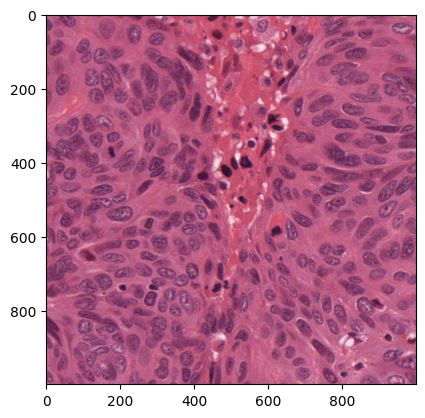

In [6]:
plt.imshow(rgb_images[image_index])

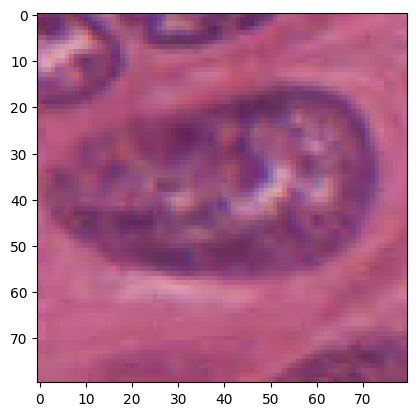

In [7]:
nucleus_radius = 40

x_low = x_click - nucleus_radius
x_high = x_click + nucleus_radius

y_low = y_click - nucleus_radius
y_high = y_click + nucleus_radius

nucleus = rgb_images[image_index][y_low:y_high,x_low:x_high,:]
plt.imshow(nucleus)

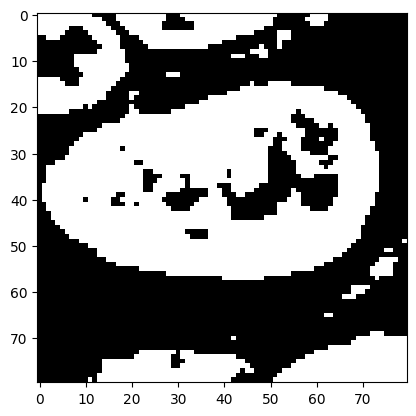

In [8]:
gray_nucleus = cv2.cvtColor(nucleus, cv2.COLOR_RGB2GRAY)
_, bin_nucleus = cv2.threshold(gray_nucleus, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
plt.imshow(bin_nucleus, cmap="gray")

In [9]:
contours, _ = cv2.findContours(bin_nucleus, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
areas = []

for contour in contours:
    areas.append(cv2.contourArea(contour))

max_contour_area_idx = np.argmax(areas)
print(max_contour_area_idx)

mask = np.zeros(bin_nucleus.shape, dtype=np.uint8)
mask = cv2.fillPoly(mask, [contours[max_contour_area_idx]], 255)

contour_img = cv2.drawContours(nucleus, [contours[max_contour_area_idx]], -1, (0, 255, 0))

10


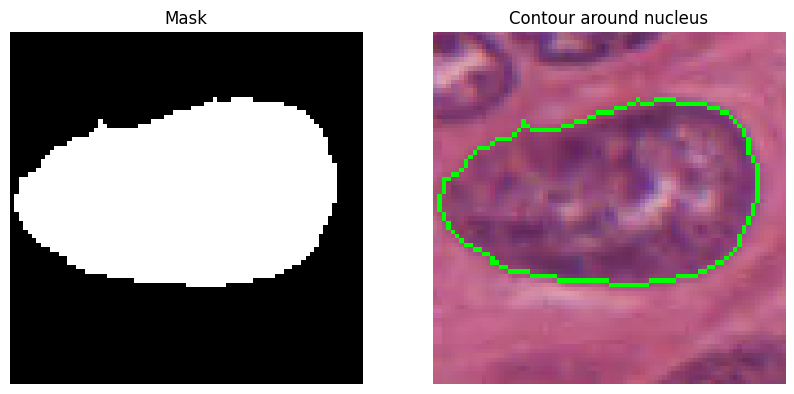

In [10]:
rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Mask")
plt.imshow(mask, cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Contour around nucleus")
plt.imshow(contour_img)

In [11]:
lab_img_nucleus = lab_images[image_index][y_low:y_high,x_low:x_high,:]
split_lab_img_nucleus = cv2.split(lab_img_nucleus)

L_ch_nucleus = split_lab_img_nucleus[0]
a_ch_nucleus = split_lab_img_nucleus[1]
b_ch_nucleus = split_lab_img_nucleus[2]

print(L_ch_nucleus.shape)
print(a_ch_nucleus.shape)
print(b_ch_nucleus.shape)

(80, 80)
(80, 80)
(80, 80)


In [12]:
L_mean_nucleus = cv2.mean(L_ch_nucleus, mask=mask)[0]
a_mean_nucleus = cv2.mean(a_ch_nucleus, mask=mask)[0]
b_mean_nucleus = cv2.mean(b_ch_nucleus, mask=mask)[0]

print(L_mean_nucleus, a_mean_nucleus, b_mean_nucleus)

101.30856423173803 163.33501259445845 115.34844668345927


In [13]:
lab_img = lab_images[image_index]

delta_L = lab_img[:,:,0] - L_mean_nucleus
delta_a = lab_img[:,:,1] - a_mean_nucleus
delta_b = lab_img[:,:,2] - b_mean_nucleus

delta_lab = np.sqrt(delta_L**2 + delta_a**2 + delta_b**2).astype(np.uint8)

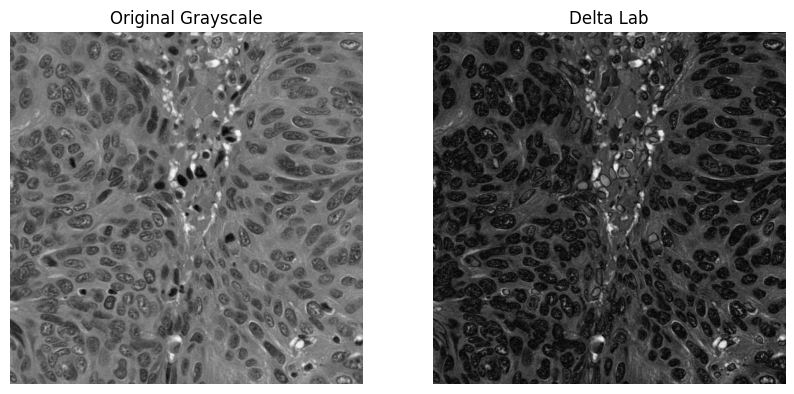

In [14]:
rows = 1
columns = 2

orig_grayscale = cv2.cvtColor(images[image_index], cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale")
plt.imshow(orig_grayscale, cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Delta Lab")
plt.imshow(delta_lab, cmap="gray")

In [15]:
filter_size = (7, 7)

orig_grayscale_blurred = cv2.GaussianBlur(orig_grayscale, filter_size, 0)
delta_lab_blurred = cv2.GaussianBlur(delta_lab, filter_size, 0)

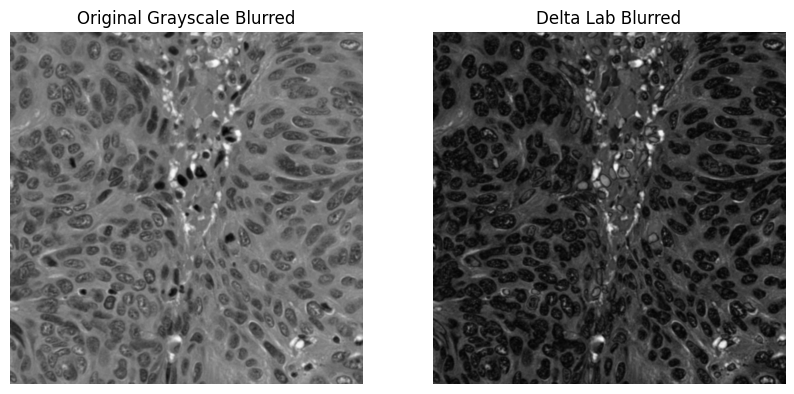

In [16]:
rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale Blurred")
plt.imshow(orig_grayscale_blurred, cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Delta Lab Blurred")
plt.imshow(delta_lab_blurred, cmap="gray")

In [17]:
_, bin_img_grayscale = cv2.threshold(orig_grayscale_blurred, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
_, bin_img_delta_lab = cv2.threshold(delta_lab_blurred, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)

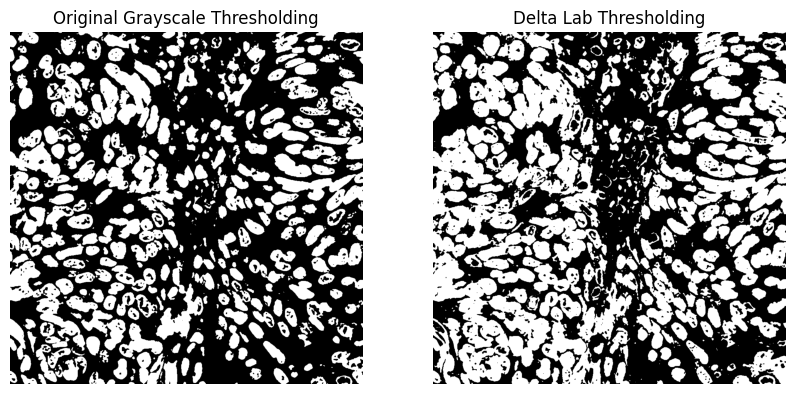

In [18]:
rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale Thresholding")
plt.imshow(bin_img_grayscale, cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Delta Lab Thresholding")
plt.imshow(bin_img_delta_lab, cmap="gray")